# Water Quality Prediction

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. 
2. Hardness: Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS): The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines: chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable. (0) Water is not safe to drink and (1) Water is safe to drink

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [3]:
df.shape

(3276, 10)

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

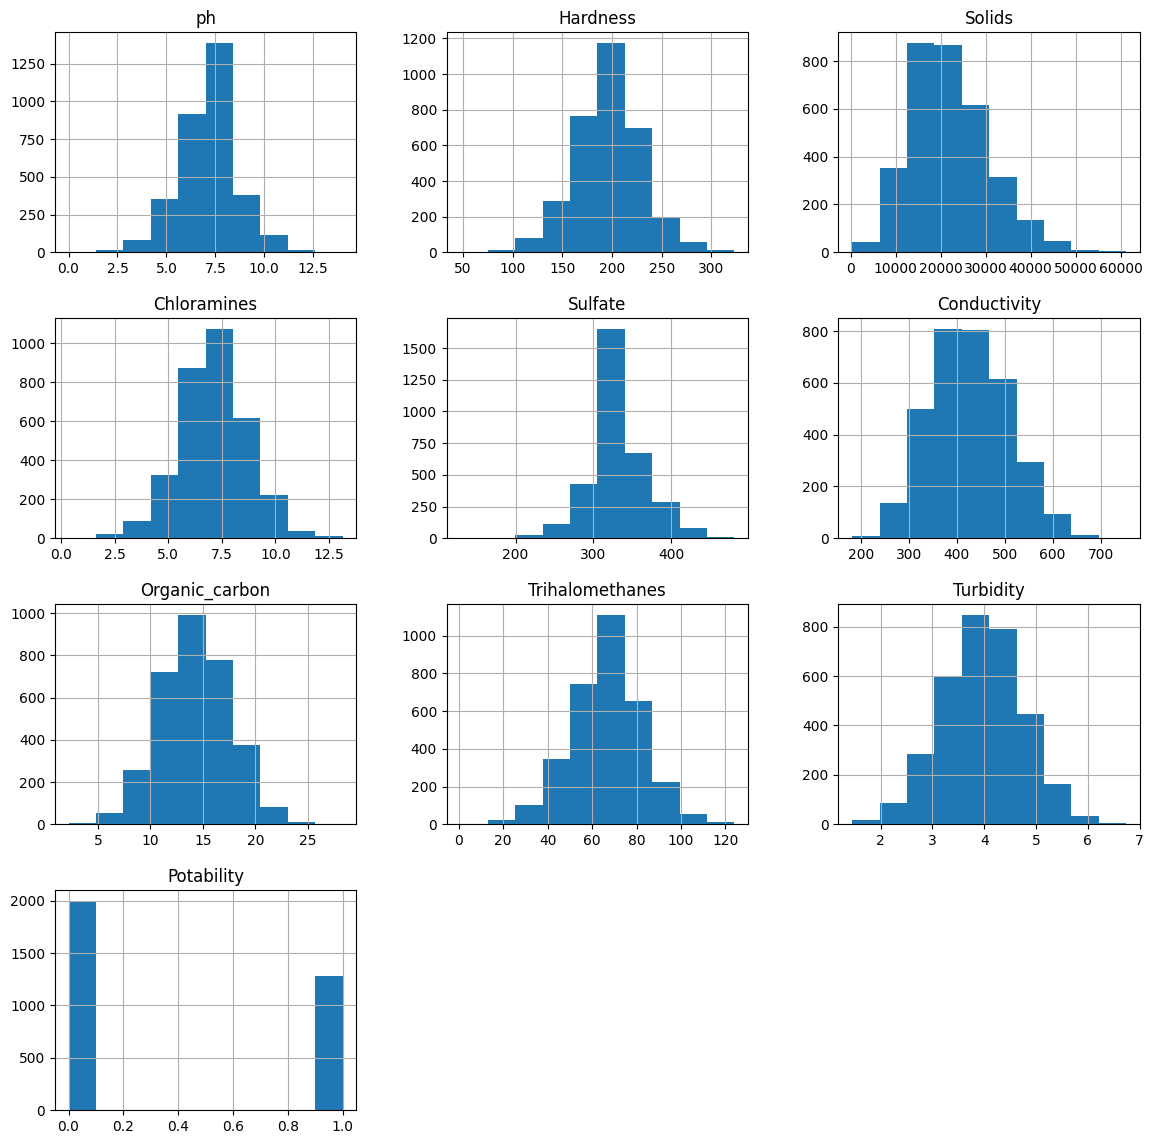

In [9]:
df.hist(figsize=(14,14))
plt.show()

<AxesSubplot:>

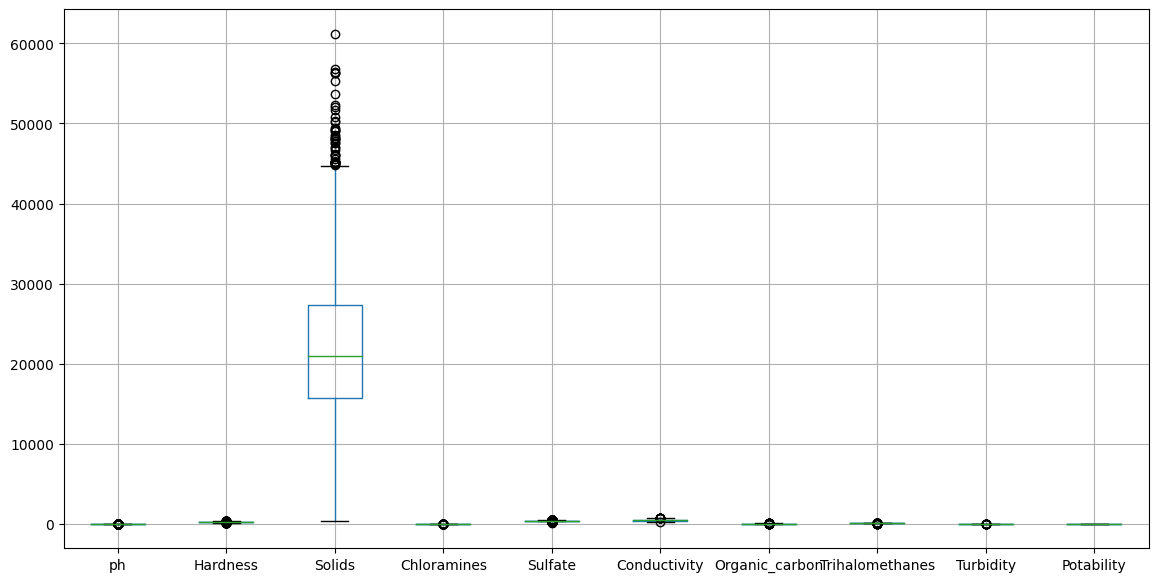

In [10]:
df.boxplot(figsize=(14,7))

In [11]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

# Train Decision Tree Classifier and check accuracy

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [14]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Accuracy Score = 58.84146341463414
Confusion Matrix =
 [[272 130]
 [140 114]]
Classification Report =
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       402
           1       0.47      0.45      0.46       254

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656



In [15]:
res = dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
res

C:\Users\MAHE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

# Apply Hyper Parameter Tuning

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.596 using {'criterion': 'gini', 'min_samples_split': 14, 'splitter': 'random'}
0.577 (0.031) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.573 (0.029) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.583 (0.033) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.575 (0.029) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.583 (0.032) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.582 (0.022) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.588 (0.031) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.576 (0.023) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.590 (0.025) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.587 (0.027) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.588 (0.026) with: {'criterion': 'gini',